# 4.10 Coding Etiquette & Excel Reporting Part 2

The Script contains the following information:

### 1. Preparation
### 2. Tasks

## 1. Preparation

In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [3]:
# defining path
path = r'C:\Users\chris\OneDrive\Desktop\Data Analytics CF\202203_Instacart Basket Analysis'

In [5]:
# Importing Dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final_results.pkl'))

In [6]:
df.shape

(32404859, 32)

## 2. Tasks

In [15]:
#creating unique customer df
df_unique_customers = df.drop_duplicates(subset = 'user_id')

In [98]:
df_unique_customers.shape

(206209, 32)

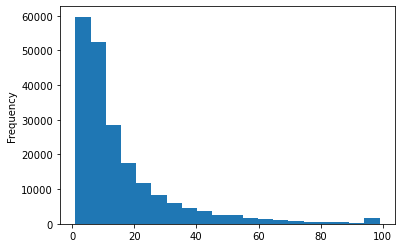

In [26]:
# Creating a histogram based on the number of max orders ("how often do they return")
histogram_customer_returns = df_unique_customers['max_order'].plot.hist(bins = 20)

In [46]:
# exporting histogram
histogram_customer_returns.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_customer_returns.png'))

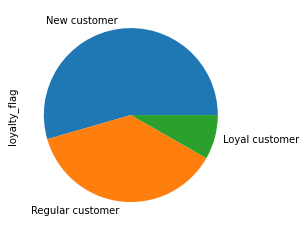

In [43]:
# creating pie chart for loyalty flag
customer_by_loyalty_flag = df_unique_customers['loyalty_flag'].value_counts().plot.pie()

In [44]:
#exporting pie chart
customer_by_loyalty_flag.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'customer_by_loyalty_flag.png'))

In [51]:
#creating pivot table for loyalty flag and day of the week order count
df.pivot_table(values = 'order_id', index= 'loyalty_flag', columns = 'orders_day_of_week', aggfunc = 'count')

orders_day_of_week,0,1,2,3,4,5,6
loyalty_flag,,,,,,,
Loyal customer,1754731,1843401,1352343,1266495,1292042,1456715,1318366
New customer,1280451,1067446,814412,731417,694739,759780,895745
Regular customer,3169000,2749383,2047075,1842622,1797021,1989296,2282379


In [53]:
# setting max columns to none so that all columns are presented for hour of day
pd.set_option('display.max_columns', None)

In [54]:
#creating pivot table for loyalty flag and hour of day order count
df.pivot_table(values = 'order_id', index= 'loyalty_flag', columns = 'order_hour_of_day', aggfunc = 'count')

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
loyalty_flag,,,,,,,,,,,,,,,,,,,,,,,,
Loyal customer,61748,30179,17788,13374,16882,29350,112865,346694,643895,882740,937669,873024,807001,824465,835162,809777,743761,584602,449336,360292,309270,264537,206150,123532
New customer,46038,26753,15925,11995,10921,16018,43381,130011,267132,403735,494425,523944,517347,531525,531180,540461,525256,448828,355925,269199,192584,145114,118649,77644
Regular customer,110983,58768,35662,25912,25439,42593,134247,414349,807091,1167728,1329666,1339172,1294184,1304964,1322794,1311906,1266185,1054224,831241,628814,474302,385986,309426,201140


In [56]:
df['price_range_loc'].value_counts()

Mid-range product     21860860
Low-range product     10126321
High-range product      417678
Name: price_range_loc, dtype: int64

In [57]:
#Analyzing ordering habits per hour of day by region
df.pivot_table(values = 'order_id', index= 'Region', columns = 'order_hour_of_day', aggfunc = 'count')

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
Region,,,,,,,,,,,,,,,,,,,,,,,,
Midwest,50748,27360,16987,11909,12690,19858,67296,208272,398142,572839,646591,641858,612342,618737,625122,628164,597360,491290,388755,296696,231243,189302,151260,92504
Northeast,38557,21543,12436,9218,9507,15395,50545,158950,305344,430111,484872,482845,465634,472706,475355,470195,446411,366163,287375,219259,170719,140342,114499,74755
South,73297,37906,21980,17437,17966,30838,98696,297744,579045,822853,923301,909371,868596,879532,893190,882322,841034,694879,543568,423557,324171,266730,208898,134974
West,56167,28891,17972,12717,13079,21870,73956,226088,435587,628400,706996,702066,671960,689979,695469,681463,650397,535322,416804,318793,250023,199263,159568,100083


In [58]:
#Analyzing ordering habits per day by region
df.pivot_table(values = 'order_id', index= 'Region', columns = 'orders_day_of_week', aggfunc = 'count')

orders_day_of_week,0,1,2,3,4,5,6
Region,,,,,,,
Midwest,1460186,1320759,991770,895093,888131,983262,1058124
Northeast,1097258,999953,746153,679308,666326,746455,787283
South,2052776,1892057,1404662,1287335,1258537,1399737,1496781
West,1593962,1447461,1071245,978798,970808,1076337,1154302


In [60]:
#Analyzing ordering habits per department by region
df.pivot_table(values = 'order_id', index= 'Region', columns = 'department_id', aggfunc = 'count')

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
Region,,,,,,,,,,,,,,,,,,,,,
Midwest,524096,8420,273869,2227937,36186,63736,625574,22355,203769,8193,105749,166129,442101,163551,250702,1264223,175824,98983,673715,245678,16535
Northeast,390918,6585,208599,1665839,26542,46891,483418,18601,151816,5802,78815,124620,329445,123574,186755,954026,131485,75139,514675,186817,12374
South,747900,12212,388815,3160551,51624,89142,898940,31269,287444,11533,150350,235752,622436,234251,356015,1796969,243070,143654,957346,349419,23193
West,571829,9074,301145,2424964,39344,69484,680191,25491,223598,9045,112658,182426,481387,181657,274586,1383529,188287,106026,741814,269335,17043


## Creating Customer profiles

There will be 2 profiling variables/flags </br>
One will be based on income, the other based on Age and fam_status

In [68]:
# creating income flag
df.loc[df['income'] < 60000, 'income_flag'] = 'low income'

In [69]:
df.loc[(df['income'] >= 60000) & (df['income'] < 125000), 'income_flag'] = 'middle income'

In [70]:
df.loc[df['income'] >= 125000, 'income_flag'] = 'high income'

In [71]:
df['income_flag'].value_counts(dropna = False)

middle income    17613761
high income       8630957
low income        6160141
Name: income_flag, dtype: int64

In [75]:
# Creating customer flag based on age and fam_status
df.loc[(df['age'] <= 29) & (df['fam_status'] != 'married'), 'customer_profile'] = 'young adult'

In [77]:
df.loc[(df['age'] > 29) & (df['age'] <= 59) & (df['fam_status'] != 'married'), 'customer_profile'] = 'single adult'

In [79]:
df.loc[(df['age'] <= 29) & (df['fam_status'] == 'married'), 'customer_profile'] = 'young parent'

In [81]:
df.loc[(df['age'] > 29) & (df['age'] <= 59) & (df['fam_status'] == 'married'), 'customer_profile'] = 'middle age parent'

In [82]:
df.loc[(df['age'] >= 60), 'customer_profile'] = 'senior'

In [83]:
df['customer_profile'].value_counts(dropna= False)

middle age parent    11434702
senior               11067255
single adult          3812461
young adult           3063833
young parent          3026608
Name: customer_profile, dtype: int64

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

In [87]:
df.groupby('customer_profile').agg({'prices' : ['sum'], 'max_order': ['max', 'mean', 'min'], 'average_price': ['max', 'mean', 'min'], 'median_days_since_prior_order': ['max', 'mean', 'min']})

prices max_order                average_price  \
                          sum       max       mean min           max   
customer_profile                                                       
middle age parent  89081128.0        99  32.993028   3  12506.924805   
senior             86259256.0        99  32.983166   1  14042.512695   
single adult       29690396.0        99  33.518519   3  25005.425781   
young adult        23854348.0        99  33.113735   3  10209.987305   
young parent       23540994.0        99  32.878148   3   4924.385254   

                                  median_days_since_prior_order             \
                        mean  min                           max       mean   
customer_profile                                                             
middle age parent  11.937320  1.0                          30.0  10.039062   
senior             11.763336  1.0                          30.0  10.015625   
single adult       12.432201  1.0                          30.0   9.976562   
young adult        11.705267  1.0                          30.0  10.039062   
young parent       12.644427  1.1                          30.0  10.015625   

                        
                   min  
customer_profile        
middle age parent  0.0  
senior             0.0  
single adult       0.0  
young adult        0.0  
young parent       0.0

In [92]:
df.groupby('income_flag').agg({'prices' : ['sum'], 'max_order': ['max', 'mean', 'min'], 'average_price': ['max', 'mean', 'min'], 'median_days_since_prior_order': ['max', 'mean', 'min']})

prices max_order                average_price             \
                       sum       max       mean min           max       mean   
income_flag                                                                    
high income     68643128.0        99  33.304760   1  25005.425781  21.348530   
low income      43566064.0        99  31.505451   2     21.272202   7.079508   
middle income  140216928.0        99  33.469334   2  12506.924805   9.103594   

                   median_days_since_prior_order                  
               min                           max       mean  min  
income_flag                                                       
high income    7.0                          30.0   9.898438  0.0  
low income     1.0                          30.0  10.531250  0.0  
middle income  7.0                          30.0   9.906250  0.0

8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [94]:
df.groupby(['customer_profile', 'Region']).agg({'prices' : ['sum'], 'max_order': ['max', 'mean', 'min'], 'average_price': ['max', 'mean', 'min'], 'median_days_since_prior_order': ['max', 'mean', 'min']})

prices max_order                 \
                                     sum       max       mean min   
customer_profile  Region                                            
middle age parent Midwest    20974484.00        99  32.765356   3   
                  Northeast  15865635.00        99  33.187829   3   
                  South      29538222.00        99  32.821905   3   
                  West       22702788.00        99  33.289624   3   
senior            Midwest    20011236.00        99  32.332389   2   
                  Northeast  15384073.00        99  33.166700   2   
                  South      28733224.00        99  33.164440   1   
                  West       22130720.00        99  33.209288   3   
single adult      Midwest     7117120.00        99  33.381188   3   
                  Northeast   4980739.00        99  32.141736   3   
                  South       9863217.00        99  33.384961   3   
                  West        7729320.50        99  34.704234   3   
young adult       Midwest     5561693.50        99  32.546152   3   
                  Northeast   4227025.50        99  33.768725   3   
                  South       8137675.50        99  33.485762   3   
                  West        5927954.00        99  32.666179   3   
young parent      Midwest     5528446.50        99  31.846771   3   
                  Northeast   4072633.75        99  34.107325   3   
                  South       7835571.50        99  33.188128   3   
                  West        6104343.50        99  32.587565   3   

                            average_price                       \
                                      max       mean       min   
customer_profile  Region                                         
middle age parent Midwest    12506.924805  12.053064  1.000000   
                  Northeast   6390.138184  11.742242  1.100000   
                  South      11772.099609  12.178548  1.400000   
                  West        7700.025879  11.653236  1.600000   
senior            Midwest     4768.028809  11.734402  1.300000   
                  Northeast   7414.485352  11.769246  1.200000   
                  South      14042.512695  12.087837  1.000000   
                  West        8703.400391  11.364153  1.300000   
single adult      Midwest    25005.425781  13.560899  1.800000   
                  Northeast   3453.431152  12.096469  1.100000   
                  South      15006.940430  13.254952  1.850000   
                  West        5560.966797  10.561385  1.000000   
young adult       Midwest     8794.882812  13.666684  2.133333   
                  Northeast   1618.085449   9.098068  1.500000   
                  South       5668.766113  12.703241  1.100000   
                  West       10209.987305  10.368125  1.000000   
young parent      Midwest     3554.246826  16.744093  2.820000   
                  Northeast   3683.847900  11.908686  1.100000   
                  South       3233.402344  10.796807  1.628572   
                  West        4924.385254  11.805876  1.300000   

                            median_days_since_prior_order                  
                                                      max       mean  min  
customer_profile  Region                                                   
middle age parent Midwest                            30.0  10.085938  0.0  
                  Northeast                          30.0  10.039062  0.0  
                  South                              30.0  10.046875  0.0  
                  West                               30.0   9.976562  0.0  
senior            Midwest                            30.0  10.171875  0.0  
                  Northeast                          30.0   9.945312  0.0  
                  South                              30.0  10.000000  0.0  
                  West                               30.0   9.945312  0.0  
single adult      Midwest                            30.0   9.875000  0.0  
               

In [95]:
# creating pivot table to compare order counts per department by customer profile
df.pivot_table(values = 'order_id', index= 'customer_profile', columns = 'department_id', aggfunc = 'count')

department_id,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
middle age parent,785754,12404,412718,3344556,53616,95178,947385,33731,306969,12202,159542,250735,662512,247556,375726,1906470,262022,150398,1021848,369194,24186
senior,767609,12251,400020,3240599,50664,91030,923708,33393,295202,11803,151869,244361,641837,238897,363738,1838082,254139,142912,982320,359502,23319
single adult,261867,4473,139333,1119238,19645,31718,317487,11477,100029,3962,52440,80933,219210,82286,125652,636194,84689,50028,338468,125119,8213
young adult,210251,3611,110813,893001,15754,26009,250559,10317,82715,3225,42336,66655,177838,67524,101117,512044,69505,41286,272697,99623,6953
young parent,209262,3552,109544,881897,14017,25318,248984,8798,81712,3381,41385,66243,173972,66770,101825,505957,68311,39178,272217,97811,6474


9. Produce suitable charts to illustrate your results and export them in your project folder.

In [96]:
# done

10. Tidy up your script, export your final data set, and save your notebook.

In [97]:
# exporting final dataframe
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_final_results_v2.pkl'))